In [1]:
pip install google-play-scraper

In [2]:
!pip install -qq google_play_scraper
!pip install -q transformers

In [3]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [4]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format
myhealth = reviews_all('com.allianzworldwidecare.mobile',sleep_milliseconds=0, lang='en', country='NG', sort=Sort.NEWEST)

In [5]:
myhealth

[{'reviewId': '41ad5bed-ef1b-4e24-8913-0234e917d17d',
  'userName': 'Mikołaj Gerlich',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocJWcNBFoiIg_tk-cwJz-K7iUBPt3D1GBXlOP3cyL5OHgehCLw=mo',
  'content': 'Application frequently doesn\'t work. Additionally BOT is providing half of the details in something what looks as Spanish after applying English as default language. Allianz helpdesk anyway provides the same quality responses so I need to say that the best idea is to translate the BOT response from multiple language in which you are reciving the details. Allianz should use slogan: "Allianz = no transparency, we quarantee only waisiting hours of your time if you will decide contacting us."',
  'score': 1,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '10.7',
  'at': datetime.datetime(2024, 12, 24, 13, 14, 3),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '10.7'},
 {'reviewId': 'bc017e1a-a5a6-4ca5-8036-a9eeaa868aa4',
  'userName': 'saif almadani',
  'userIm

In [6]:
# convert the json data into a dataframe
myhealth_df = pd.json_normalize(myhealth)

In [7]:
myhealth_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,41ad5bed-ef1b-4e24-8913-0234e917d17d,Mikołaj Gerlich,https://play-lh.googleusercontent.com/a/ACg8oc...,Application frequently doesn't work. Additiona...,1,0,10.7,2024-12-24 13:14:03,None,NaT,10.7
1,bc017e1a-a5a6-4ca5-8036-a9eeaa868aa4,saif almadani,https://play-lh.googleusercontent.com/a-/ALV-U...,Submitting a claim can be a pain a lot of time...,2,0,10.7,2024-12-21 09:32:00,None,NaT,10.7
2,6503b081-51da-4dd6-a18d-d2185c7094fd,Abdul Basit,https://play-lh.googleusercontent.com/a-/ALV-U...,Th app is not opening on my phone,1,0,None,2024-12-18 17:13:08,None,NaT,None
3,da9b25ff-5da5-4136-b8a0-4dd978b998cc,Rv Maan,https://play-lh.googleusercontent.com/a-/ALV-U...,good,3,0,10.6,2024-12-18 15:37:08,None,NaT,10.6
4,bff2dbac-3930-42b5-b0ba-4e6ddd6c8fd4,Sun Wang Jun,https://play-lh.googleusercontent.com/a-/ALV-U...,Does not have safe area for devices with punch...,2,0,10.6,2024-12-08 12:21:37,None,NaT,10.6


In [8]:
myhealth_df['score'].value_counts()

score
5    1085
1     430
4     277
3     128
2     126
Name: count, dtype: int64

In [9]:
myhealth_df['score'].mean()

3.7140762463343107

In [10]:
myhealth_df.shape

(2046, 11)

## Sentiment Analysis

In [12]:
# pip install --upgrade pip

In [13]:
# pip install torch torchvision torchaudio

In [14]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [15]:
# pip install tensorflow

In [16]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = "Desktop/New f"  # Directory to save the model

In [34]:
# Load the pipeline and save the model
!pip install tf-keras
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 1.9 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 1.5 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 1.7 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.5 MB/s eta 0:00:00



Device set to use cpu
Device set to use cpu


In [36]:
# Test the reused model
# play with the parameter and see if it works

result = sentiment_analysis_reuse("I am really enjoying this")
print(result)

[{'label': 'POSITIVE', 'score': 0.9989049434661865}]


In [38]:
#removing wildcharacter and cleaning the content column by casting to a str
myhealth_df['content_new']= myhealth_df['content'].astype('str')

In [40]:
myhealth_df['result'] = myhealth_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))

In [42]:
myhealth_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result
0,41ad5bed-ef1b-4e24-8913-0234e917d17d,Mikołaj Gerlich,https://play-lh.googleusercontent.com/a/ACg8oc...,Application frequently doesn't work. Additiona...,1,0,10.7,2024-12-24 13:14:03,None,NaT,10.7,Application frequently doesn't work. Additiona...,"[{'label': 'NEGATIVE', 'score': 0.999496817588..."
1,bc017e1a-a5a6-4ca5-8036-a9eeaa868aa4,saif almadani,https://play-lh.googleusercontent.com/a-/ALV-U...,Submitting a claim can be a pain a lot of time...,2,0,10.7,2024-12-21 09:32:00,None,NaT,10.7,Submitting a claim can be a pain a lot of time...,"[{'label': 'NEGATIVE', 'score': 0.995131492614..."
2,6503b081-51da-4dd6-a18d-d2185c7094fd,Abdul Basit,https://play-lh.googleusercontent.com/a-/ALV-U...,Th app is not opening on my phone,1,0,None,2024-12-18 17:13:08,None,NaT,None,Th app is not opening on my phone,"[{'label': 'NEGATIVE', 'score': 0.999466478824..."
3,da9b25ff-5da5-4136-b8a0-4dd978b998cc,Rv Maan,https://play-lh.googleusercontent.com/a-/ALV-U...,good,3,0,10.6,2024-12-18 15:37:08,None,NaT,10.6,good,"[{'label': 'POSITIVE', 'score': 0.998530626296..."
4,bff2dbac-3930-42b5-b0ba-4e6ddd6c8fd4,Sun Wang Jun,https://play-lh.googleusercontent.com/a-/ALV-U...,Does not have safe area for devices with punch...,2,0,10.6,2024-12-08 12:21:37,None,NaT,10.6,Does not have safe area for devices with punch...,"[{'label': 'NEGATIVE', 'score': 0.999342143535..."


In [44]:
# spliting the result into sentiment and score
myhealth_df['sentiment'] = myhealth_df['result'].apply(lambda x: (x[0]['label']))
myhealth_df['score'] = myhealth_df['result'].apply(lambda x: (x[0]['score']))

In [46]:
myhealth_df[['content','score','sentiment']]

,content,score,sentiment
0,Application frequently doesn't work. Additiona...,0.999497,NEGATIVE
1,Submitting a claim can be a pain a lot of time...,0.995131,NEGATIVE
2,Th app is not opening on my phone,0.999466,NEGATIVE
3,good,0.998531,POSITIVE
4,Does not have safe area for devices with punch...,0.999342,NEGATIVE
...,...,...,...
2041,Asks for 5 digit pin and doesn't go ahead when...,0.999494,NEGATIVE
2042,The app is stuck at the screen where I have to...,0.999502,NEGATIVE
2043,thanksa lot,0.998162,POSITIVE
2044,Super HealthFull,0.998798,POSITIVE


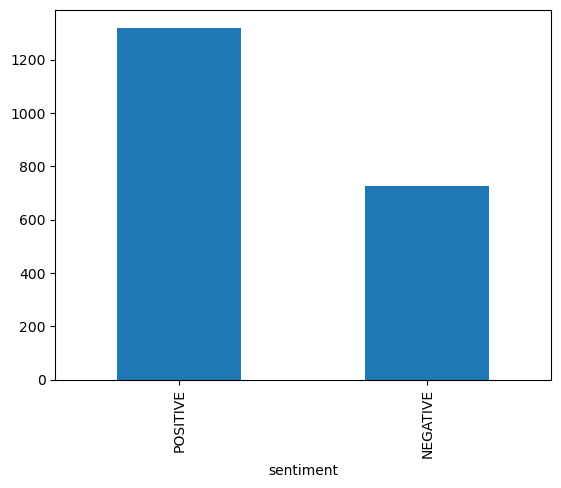

In [48]:
myhealth_df['sentiment'].value_counts().plot(kind='bar');

## Topic modeling

In [52]:
#generate a series for the reviews
feature_google=myhealth_df['content']
print(feature_google.size)
feature_google.head()

2046


0    Application frequently doesn't work. Additiona...
1    Submitting a claim can be a pain a lot of time...
2                    Th app is not opening on my phone
3                                                 good
4    Does not have safe area for devices with punch...
Name: content, dtype: object

In [54]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [56]:
# Import the necessary libraries
from textblob import TextBlob


# Define a function to translate the text to English
def translate_to_en(text):
    blob = TextBlob(str(text))
    try:
        return str(blob.translate(to='en'))
    except:
        return str(text)

# Apply the translate_to_en function to the 'review' column of the DataFrame
feature_google = feature_google.apply(translate_to_en)

# Print the top 5 rows of the DataFrame with the new 'review_en' column
print(feature_google.head())

0    Application frequently doesn't work. Additiona...
1    Submitting a claim can be a pain a lot of time...
2                    Th app is not opening on my phone
3                                                 good
4    Does not have safe area for devices with punch...
Name: content, dtype: object


In [ ]:
#!pip install bertopic

In [58]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(feature_google.
                                   astype(str))

In [60]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,357,-1_the_it_and_my,"[the, it, and, my, you, to, is, for, app, update]",[It used to work perfectly since I got the las...
1,0,242,0_upload_photo_the_of,"[upload, photo, the, of, picture, take, from, ...",[But it would be good to also allow the upload...
2,1,159,1_app_very_easy_use,"[app, very, easy, use, useful, friendly, and, ...","[Very easy and user friendly app, very useful ..."
3,2,115,2_claims_easy_claim_submit,"[claims, easy, claim, submit, very, submission...","[Very easy to submit claims., Very easy to use..."
4,3,93,3_allianz_insurance_health_app,"[allianz, insurance, health, app, medical, the...","[Allianz is an excellent insurance company., A..."
5,4,79,4_claim_claims_app_makes,"[claim, claims, app, makes, is, and, process, ...",[Claim submission process is so easy with this...
6,5,54,5_open_screen_blank_it,"[open, screen, blank, it, page, app, android, ...",[Installed the app but now the app opens on a ...
7,6,53,6_good_enough_ok_vgood,"[good, enough, ok, vgood, continuation, fair, ...","[Good.., Good, good]"
8,7,49,7_password_login_reset_register,"[password, login, reset, register, cant, log, ...",[I'm unable to reset my password via the app. ...
9,8,44,8_fast_easy_quick_simple,"[fast, easy, quick, simple, and, simply, its, ...","[Easy. fast, easy and fast, Easy and fast]"


In [62]:
myhealth_df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'content_new', 'result', 'sentiment'],
      dtype='object')

In [64]:
# the data to excel
output_file = 'playstore_reviews.xlsx'
myhealth_df.to_excel(output_file, index=False)

In [66]:
pip install mysql-connector-python --upgrade

Note: you may need to restart the kernel to use updated packages.


# ETL code

In [68]:
dataframe = myhealth_df

In [70]:
data = [tuple(row) for row in myhealth_df.to_numpy()]

In [72]:
# Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")

Column 'result' contains list values.


In [74]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )

In [76]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)

In [78]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': '',
    'database': 'myplaystore_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """

    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "myplaystore_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()

Database 'myplaystore_reviews' does not exist. Creating it...
Database 'myplaystore_reviews' created successfully!
Table `myplaystore_reviews` created successfully!
2046 rows inserted/updated successfully!
MySQL connection closed.
